# Project Name EDA

## Project Description

Goal: 

Context:

Data Source:

Author:

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import cookbook_eda as eda
from IPython.core.display import HTML

## Load data

[Pandas I/O](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

`pd.read_csv`, `pd.read_json`, `pd.read_sql`
`pd.read_html`,`pd.read_xml`,`pd.read_clipboard`,
`pd.read_excel`,`pd.read_hdf`,`pd.read_feather`
`pd.read_parquet`, `pd.read_orc`, `pd.read_sas`, 
`pd.read_spss`, `pd.read_pickle`, `pd.read_gbq`

In [3]:
source = 'penguins'
df = sns.load_dataset(source); print(f"shape: {df.shape}, memory: {df.memory_usage(deep=True).sum()}")
df.sample(5)

shape: (344, 7), memory: 75711


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,Female
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,Male
300,Gentoo,Biscoe,49.1,14.5,212.0,4625.0,Female
35,Adelie,Dream,39.2,21.1,196.0,4150.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female


In [8]:
with pd.option_context("display.max_colwidth", 200):
    display(eda.all_types_df(df))

cols
NUMERIC   np number       [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
          np int                                                                       []
          np int8                                                                      []
          np int16                                                                     []
          np int32                                                                     []
          np int64                                                                     []
          np float        [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
          np float16                                                                   []
          np float32                                                                   []
          np float64      [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
          pd Int64                                                                     []
OBJ / CAT np object                                                [species, island, sex]
          pd categorical                                                               []
BOOLEAN   np bool                                                                      []
          pd boolean                                                                   []
TIME      np datetime                                                                  []
          pd datetimez                                                                 []
          np timedelta                                                                 []

In [4]:
eda_df = eda.enriched_describe(df)
eda_df

nan_counts  count unique  \
MAIN_TYPE detailed_dtype cols                                          
NUMERIC   np number      bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
          np float       bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
          np float64     bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
OBJ / CAT np object      species                     0    344      3   
                         island                      0    344      3   
                         sex                        11    333      2   

                                                   mean         std     min  \
MAIN_TYPE detailed_dtype cols                                                 
NUMERIC   np number      bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
          np float       bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
          np float64     bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
OBJ / CAT np object      species                      -           -       -   
                         island                       -           -       -   
                         sex                          -           -       -   

                                               25%     50%     75%     max  \
MAIN_TYPE detailed_dtype cols                                                
NUMERIC   np number      bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
          np float       bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
          np float64     bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
OBJ / CAT np object      species                 -       -       -       -   
                         island                  -       -       -       -   
                         sex                     -       -       -       -   

                                               top freq  
MAIN_TYPE detailed_dtype cols                            
NUMERIC   np number      bill_le

Input from Domain Expert:
  - Missing values
        - why are some values are missing? 
        - can they have a meaning? 
        eg NaN can be replaced by zero, observation should be imputed or discarted etc...
        
  - Any apparent issue ? 
         - e.g. missing unique values in a category
         - e.g. suspicious distributions, wrong units ...
  - Candidate columns
         - object to Categorical
         - object to bool
         - float to integer after NaN removal
         - float precision 
         - use Nullable type if it makes sense (pd.Int64, pd.Boolean)

_______________

In [4]:
lst = ["np object", "np float"]
eda.subset(eda_df, lst)

nan_counts  count unique  \
MAIN_TYPE detailed_dtype cols                                          
OBJ / CAT np object      species                     0    344      3   
                         island                      0    344      3   
                         sex                        11    333      2   
NUMERIC   np float       bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   

                                                   mean         std     min  \
MAIN_TYPE detailed_dtype cols                                                 
OBJ / CAT np object      species                      -           -       -   
                         island                       -           -       -   
                         sex                          -           -       -   
NUMERIC   np float       bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   

                                               25%     50%     75%     max  \
MAIN_TYPE detailed_dtype cols                                                
OBJ / CAT np object      species                 -       -       -       -   
                         island                  -       -       -       -   
                         sex                     -       -       -       -   
NUMERIC   np float       bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   

                                               top freq  
MAIN_TYPE detailed_dtype cols                            
OBJ / CAT np object      species            Adelie  152  
                         island             Biscoe  168  
                         sex                  Male  168  
NUMERIC   np float       bill_length_mm          -    -  
                         bill_depth_mm           -    -  
                         flipper_length_mm       -    -  
                         body_mass_g             -    -

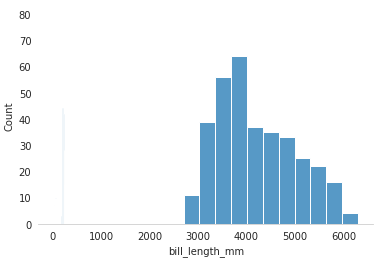

In [7]:
(
    eda_df.assign(histogram_snippet=[f"img/hist_{col}.png"
                                     for col in eda_df.index.get_level_values("cols")])
        .pipe(lambda df: df.to_html(escape=False,
                                    formatters=dict(histogram_snippet=path_to_image_html)
                                   )
             )
)

nan_counts  count unique  \
MAIN_TYPE detailed_dtype cols                                          
NUMERIC   np number      bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
          np float       bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
          np float64     bill_length_mm              2    342      -   
                         bill_depth_mm               2    342      -   
                         flipper_length_mm           2    342      -   
                         body_mass_g                 2    342      -   
OBJ / CAT np object      species                     0    344      3   
                         island                      0    344      3   
                         sex                        11    333      2   

                                                   mean         std     min  \
MAIN_TYPE detailed_dtype cols                                                 
NUMERIC   np number      bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
          np float       bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
          np float64     bill_length_mm        43.92193    5.459584    32.1   
                         bill_depth_mm         17.15117    1.974793    13.1   
                         flipper_length_mm   200.915205   14.061714   172.0   
                         body_mass_g        4201.754386  801.954536  2700.0   
OBJ / CAT np object      species                      -           -       -   
                         island                       -           -       -   
                         sex                          -           -       -   

                                               25%     50%     75%     max  \
MAIN_TYPE detailed_dtype cols                                                
NUMERIC   np number      bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
          np float       bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
          np float64     bill_length_mm     39.225   44.45    48.5    59.6   
                         bill_depth_mm        15.6    17.3    18.7    21.5   
                         flipper_length_mm   190.0   197.0   213.0   231.0   
                         body_mass_g        3550.0  4050.0  4750.0  6300.0   
OBJ / CAT np object      species                 -       -       -       -   
                         island                  -       -       -       -   
                         sex                     -       -       -       -   

                                               top freq  \
MAIN_TYPE detailed_dtype cols                             
NUMERIC   np number      bill_

In [12]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="120" >'

In [14]:
def t():
    return HTML(eda_df.to_html(escape=False, 
           formatters=dict(histogram_snippet=path_to_image_html)
          )
    )

In [16]:
t()